In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#导入数据
df=pd.read_csv('Q:/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#检查是否有缺失值
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
#适当改名，方便选取列
df = df.rename(columns={'satisfaction_level': 'satisfaction_level',
'last_evaluation': 'last_evaluation',
'number_project': 'number_project',
'average_montly_hours':
'average_montly_hours',
'time_spend_company':
'time_spend_company',
'Work_accident': 'Work_accident',
'promotion_last_5years': 'promotion',
'sales' : 'department',
'left' : 'left'
})

In [5]:
#分别查看 department 列和 salary 列唯一值有多少个
df1=pd.Series(df['department']).unique()
df2=pd.Series(df['salary']).unique()

In [6]:
#把两列的值转化为数值
df['department'].replace(list(pd.Series(df['department']).unique()
),np.arange(10),inplace=True)
df['salary'].replace(list(pd.Series(df['salary']).unique()),[0,1,2],inplace=True)

In [7]:
#把 left 列移到表的前面，方便分析
front=df['left']
df.drop(labels='left',axis=1,inplace=True)
df.insert(0,'left',front)
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


In [8]:
#查看数据形状和结构
df.shape

(14999, 10)

In [9]:
# 初步分析
#对 left 列进行聚合运算，描述性分析
left_summary=df.groupby('left')
left_summary.mean()
format = lambda x: '%.2f'%x
df.describe().applymap(format)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.24,0.61,0.72,3.80,201.05,3.50,0.14,0.02,3.34,0.59
std,0.43,0.25,0.17,1.23,49.94,1.46,0.35,0.14,2.82,0.64
min,0.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00
50%,0.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00,3.00,1.00
75%,0.00,0.82,0.87,5.00,245.00,4.00,0.00,0.00,6.00,1.00
max,1.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00,9.00,2.00


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

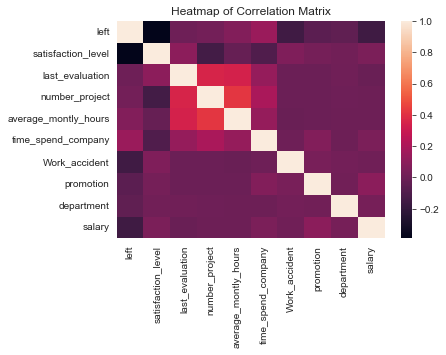

In [10]:
# 相关性
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values);
plt.title('Heatmap of Correlation Matrix')


In [11]:
#department vs left
depart_left_table=pd.crosstab(index=df['department'],columns
=df['left'])

<AxesSubplot:xlabel='department'>

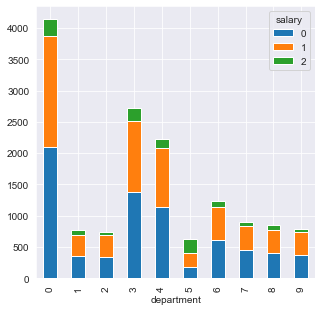

In [17]:
##department vs salary
depart_salary_table=pd.crosstab(index=df['department'],columns=df['salary'])
depart_salary_table.plot(kind="bar",figsize=(5,5),stacked=True)

<AxesSubplot:xlabel='salary'>

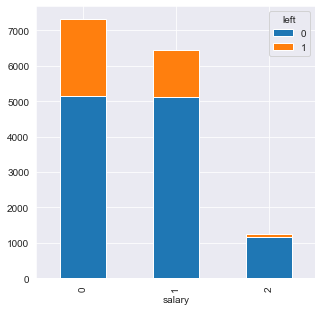

In [16]:
##salary vs left
salary_left_table=pd.crosstab(index=df['salary'],columns=df['left'])
salary_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

<AxesSubplot:xlabel='promotion'>

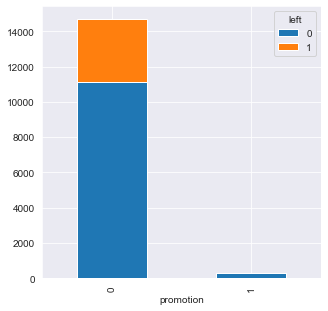

In [13]:
# 在离职的员工中几乎都没有得到升职。
#promotion vs left
promotion_left_table=pd.crosstab(index=df['promotion'],columns=df['left'])
promotion_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

<AxesSubplot:xlabel='time_spend_company', ylabel='Frequency'>

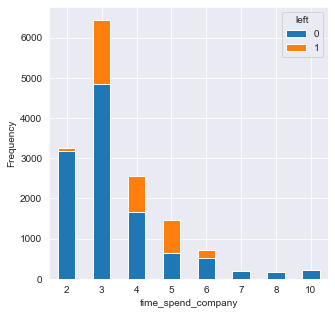

In [14]:
#time_spend_company vs left
company_left_table=pd.crosstab(index=df['time_spend_company'],columns=df['left'])
company_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'time_spend_company'].plot(kind='hist',density=0.7,bins=10,stacked=False,alpha=1)

<AxesSubplot:xlabel='time_spend_company', ylabel='Frequency'>

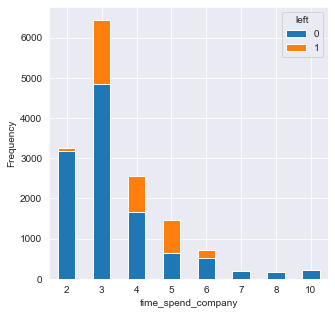

In [15]:
#time_spend_company vs left
company_left_table=pd.crosstab(index=df['time_spend_company'],columns=df['left'])
company_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'time_spend_company'].plot(kind='hist',density=0.7,bins=10,stacked=False,alpha=1)
